Binary Classification(Supervised-learning) of Churn percentage 


Steps:

reading dataset

replacing null values

convert cateogerical data to numerical data

split data into input & output variables

converting numerical data to binary

split data into train, test

scaling data (optional)

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv(r"Churn_Modelling.csv")

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

Here suppose exited status is affected by credit score, geography, gender, age, tenure, balance, noOfProducts, HasCrCard, IsActiveMember, Est Salary. Those columns having non-numerical data must be converted into numerical data
(which here are Geography, Gender)

Dependent Input & Output must be numerical data which will further be converted to binary down-the-road

So we convert this cateogerical data into numerical data with sklearn

In [5]:
from sklearn.preprocessing import LabelEncoder #Converts labels into numerical data(done by encoder)

In [6]:
le = LabelEncoder() 
dataset['Geography'] = le.fit_transform(dataset['Geography'])
dataset['Gender'] = le.fit_transform(dataset['Gender'])
#Converts each country, gender name into numerical data using alphabetical order(done by labelencoder)

In [7]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
x = dataset.iloc[:,3:13] #Input variables Col 3-13, 0-2 columns are discarded since they don't affect output
y = dataset.iloc[:,13] #The last column which is output
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [9]:
x = x.values
y = y.values
type(x)
#convert dataframe into numpy array for mathematical operations

numpy.ndarray

In [10]:
x

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [11]:
#Convert all Numerical Data into Binary Data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
oe = ColumnTransformer([('OneHotEncoder',OneHotEncoder(), [1])], remainder="passthrough") #ColumnTranformer([("any name",OneHotEncoder()#Object of OneHotEncoder,[1,2,3]#List of columns to be tranformed. One or more numbers can be written)],remainder = "passthrough"#What to do with remaining columns. Passthrough means leave remaining columns as such)
x = oe.fit_transform(x)
x

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [12]:
x[0] #Here if we observe except for 1st col remaining columns are left untouched. Now 1st column is removed from its original position & since we know 1st column(Starts from 0,1,2.....) is geography.

#In geography there are 3 classes.France, Germany, Spain(0,1,2). Instead of it directly converting 0,1,2 into binary it actually appends three columns to front of array
#France Germany Spain
#  1       0      0  - If geography = France
#  0       0      1  - If geography = Spain etc.
#That's why originally there are 10 columns in x. Now after onehotencoding it removed 1st column and added 3 columns. so after this x has 12 columns
#We neglect onehotencoding for gender(even though it was label encoded) because it only has 2 values(0,1) sufficent to satisfy binary. If suppose we have more classes, we can specify the columns in ColumnTransformer

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
       0.0000000e+00, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

In [13]:
x = x[:,1:] #we do this because we are removing dummy variable/state. Remember previously geography has 3 values(0,1,2). If we represent them in binary (00,01,10) - only two values are enough to represent. But in onehotencoding it has added 3 values for geography(100,010,001). So we can instead reduce the memory by removing 0th column(dummy. Important: always remove 0th column for dummy) and continue without affecting the uniqueness(This step is completely optional)
x

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [14]:
x.shape

(10000, 11)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)#train_test_split(x,y,size_of_training(lies between 0 and 1, 0.2 indicates 20% of total dataset for testing and remaining 80% for training),random_state(if you want to split data randomly(1) or sequentially(0), If you want to give first 20% of data to test or 20% from total data randomly selected))

In [16]:
x_train.shape, y_train.shape

((8000, 11), (8000,))

In [17]:
x_test.shape,y_test.shape

((2000, 11), (2000,))

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
#Scaling of data. It is similar to normalization
#Basically converting every column data into particular range(ex: say (0,1) or (-1,1))
#This is done to reduce impact on weights of particular column having higher range and values compared to column having lower values and range
#Also used when values in a particular column have too much variation. Many values are far from each other
#Every value in particular column xi = (xi - mean)/(Standard Deviation); SD =sqrt(1/N*(xi(i = 1 to N) - mean)^2) 

In [19]:
x_train

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [20]:
x_train[0]

array([-0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46460796,
        0.00666099, -1.21571749,  0.8095029 ,  0.64259497, -1.03227043,
        1.10643166])

Steps for Neural Network Implementation:
Typical Keras Model

Initialize model - Seq model, Functional model

Insert Input Layer, Hidden Layers, Output Layer - weights, bias, input nodes, activation function

Activation Functions: 

Output b/w 0 and 1(ex: binary classification) - sigmoid, binary step, tanh etc.

If regression kind of problem then reLU

If cateogerical classification, then softmax

Cost Function:
For optimizing weights (backward propagation) we can use sgd or adam
sgd - finding perfect local minima(sometimes global minima), more accuracy, slow learner - for each i/p & o/p

adam - finding nearest local minima, less accuracy, fast learner - calculated for set/batches of i/p & o/p

Optimizer defines number of times cost function should be calculated & loss defines the cost function



Compile the Model(forward/backward propagation) - Optimizer(Stociastic Gradient Descent(sgd), Mini Batch Gradient Descent(adam)), loss(Cost Function) = binary_crossentropy(binary classifcation), cateogerical cross entropy(cateogerical classifcation), mean sq error(regression), metrics(for getting req output metric) = root mean sq error, accuracy(confusion matrix) 

binary cross entropy = -(y*log(p) + (1-y)*log(1-p))

mean sq error = 1/N*(y - y')^2

                y = actual value,
                y' or 1-y = predicted value
                p = probability of i/p
                N = no of rows(no of times cost function was calculated, for sgd N = 2)

Training the model

Prediction

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [22]:
classifier = Sequential()

In [23]:
#Input Layer
#Here for this example inputs are continuous numerical data(regression - no of independent i/p data which determines the dependent o/p)
#Since its regression, we can go for relu as activation function for i/p and hidden layers
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu')) #Dense(no of inputs, weights initialisation, activation function)

Ideal hidden layers = no of input layers/2(old), 
                    
                     = n*(no of input layers), n > no of input layers(new)

we consider  old way for this example

In [24]:
#Hidden Layers
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [25]:
#Output Layers
#Here for this example exit status is 0 or 1(binary classification) - 1 output
#Since its binary classification, we can go for sigmoid as activation function
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [26]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [27]:
classifier.fit(x_train, y_train,batch_size = 16, epochs = 100) #here since adam is optimizer, batch_size is given(16 or 32)

Epoch 1/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4984 - accuracy: 0.7954
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.7960
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4217 - accuracy: 0.8054
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4157 - accuracy: 0.8266
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4109 - accuracy: 0.8315
Epoch 6/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4077 - accuracy: 0.8326
Epoch 7/100
500/500 [==============================] - 1s 3ms/step - loss: 0.4050 - accuracy: 0.8345
Epoch 8/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4031 - accuracy: 0.8336
Epoch 9/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4012 - accuracy: 0.8351
Epoch 10/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4007 - accura

In [28]:
y_pred = classifier.predict(x_test)
y_pred = y_pred > 0.5 #0.5 is threshold for sigmoid(Remember x = 0, y = 0.5. Right side of it y_values are increasing, left_side of it y_values are decreasing)(we get np array of true(1) and false(0), remember y_test is 0,1)

In [29]:
True == 1

True

In [30]:
#Testing accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc*100

85.8

In [31]:
#Giving our own i/p and finding prediction
y_p = classifier.predict(sc.transform(np.array([[1,0,75,0,25,2,40000,4,1,1,5000]])))
y_p
y_p[0] > 0.5

array([ True])

In [32]:
from sklearn.metrics import confusion_matrix
cmn = confusion_matrix(y_test,y_pred)
cmn

array([[1486,  109],
       [ 175,  230]], dtype=int64)

<AxesSubplot:>

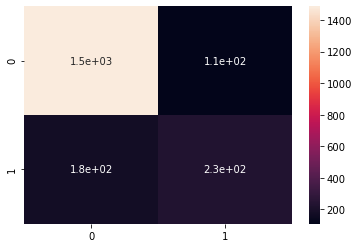

In [33]:
import seaborn as sns
sns.heatmap(cmn, annot=True)

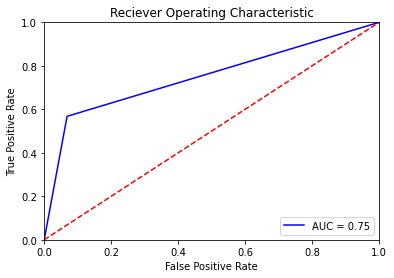

In [34]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b',label="AUC = %0.2f" %roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1],[0, 1],"r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

r2_score(R2) = 1 - (ss(res)/ss(tot))

ss(res) = sum((yi - yi^)^2) -> min of all 
ss(tot) = sum((yi - yi(avg))^2)
yi(avg) = sum(yi)/N i = 1 to N

yi^ is projection(same xi lying on best fit line) of yi onto best fit line 
best fit line is line passing through or nearer to all yi's where ss(res) is the min

best fit line can be any line that is in plane of yi but the one having smallest ss(res) is best fit

confusion_matrix = 

          Predicted
            1   0
Actual  1
        0



True Positive rate(TPR)/Recall/Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

False Positive rate(FPR) = 1 - Specificity

                         = FP/(TN+FP)

    TP - True Positive(Predicted -1, Acual -1)

    TN - True Negative(Predicted -0, Acual -0)

    FP - False Positive(Predicted -1, Acual -0)
    
    FN - False Negative(Predicted -0, Acual -1)


AUC - Area Under Curve 
  Higher the AUC better our model performance is(Most predicted are equal to actual values) degree/measure of seperability

ROC - Reciever Operator Characteristic-probablity curve

ROC-AUC Curve - b/w TPR(y) vs FPR(x)

TPR & FPR lie b/w 0 and 1

  Performance measurement for classification problems at various thresholds 